<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; font-size: 25px">INTRODUCTION</div>

This notebooks consolidates basic techniques for text pre-processing

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em;  font-size: 25px">SETUP</div>

 ## <font color=red>1. Import library</font>

In [1]:
import joblib
import sys
import sklearn
import pandas as pd
import numpy as np

## for data
import collections
import json

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for processing text data
import spacy
nlp = spacy.load('en_core_web_sm')
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
from nltk.tokenize.toktok import ToktokTokenizer
import string
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

import string
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.corpus import stopwords

# for calculating similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import  LabelEncoder

wpt = nltk.WordPunctTokenizer()
tokenizer = ToktokTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
nlp = spacy.load('en_core_web_sm')

## for word embedding
import gensim
import gensim.downloader as gensim_api
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# display various ranges 
pd.options.display.float_format = '{:.3f}'.format

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print('Python: {}'.format(sys.version))
print('NLTK: {}'.format(nltk.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('spacy: {}'.format(spacy.__version__))
print("Setup complete...")

C:\Users\Mai\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
NLTK: 3.6.5
Scikit-learn: 0.23.2
Pandas: 1.5.3
Numpy: 1.21.2
spacy: 3.2.6
Setup complete...


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em;  font-size: 25px">DATA</div>

 ## <font color=red>1. sample data include car reviews and restaurant reviews </font>

In [2]:
corpus = ['Best car on this planet',
          'I test drove one and never looked back',
          'The shrimp tasty, tender and moist.',
          'Not much seafood and like 5 strings of pasta at the bottom.',
          'The only thing I did like was the prime rib and dessert section',
          'The salad had just the right amount of sauce to not over power the scallop, which was perfectly cooked.',
          'Awesome car for awesome people',
          'their cafe serves really good food.',          
          #'My side Greek salad with the Greek dressing was so tasty, and the pita and hummus was very refreshing.',
          'Everything was fresh and delicious!',
          'One of the best cars I have ever driven',
]
labels = ['car','car','restaurant','restaurant','restaurant','restaurant','car','restaurant','restaurant','car']
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,Best car on this planet,car
1,I test drove one and never looked back,car
2,"The shrimp tasty, tender and moist.",restaurant
3,Not much seafood and like 5 strings of pasta a...,restaurant
4,The only thing I did like was the prime rib an...,restaurant
5,The salad had just the right amount of sauce t...,restaurant
6,Awesome car for awesome people,car
7,their cafe serves really good food.,restaurant
8,Everything was fresh and delicious!,restaurant
9,One of the best cars I have ever driven,car


 ## <font color=red>2. News_Category dataset </font>

In [3]:
df = pd.read_csv('News_Category.csv')
print(df.shape)
df = df.reset_index(drop=True)

df.head(5)

(26768, 4)


,category,headline,short_description,text
0,BUSINESS,"U.S. Launches Auto Import Probe, China Vows To...",The investigation could lead to new U.S. tarif...,"U.S. Launches Auto Import Probe, China Vows To..."
1,BUSINESS,Starbucks Says Anyone Can Now Sit In Its Cafes...,The new policy was unveiled weeks after the co...,Starbucks Says Anyone Can Now Sit In Its Cafes...
2,BUSINESS,Seattle Passes Controversial New Tax On City's...,"Following the council vote, Amazon’s vice pres...",Seattle Passes Controversial New Tax On City's...
3,BUSINESS,Uber Ends Forced Arbitration In Individual Cas...,Victims will be free to go to court -- but a f...,Uber Ends Forced Arbitration In Individual Cas...
4,BUSINESS,"Chili's Hit By Data Breach, Credit And Debit C...",The breach is believed to have occurred betwee...,"Chili's Hit By Data Breach, Credit And Debit C..."


In [7]:
for i in range(0,5):
    print(df.text[i])
    print('\n')

U.S. Launches Auto Import Probe, China Vows To Defend Its Interests. The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.


Starbucks Says Anyone Can Now Sit In Its Cafes -- Even Without Buying Anything. The new policy was unveiled weeks after the controversial arrest of two black men at a Philadelphia Starbucks.


Seattle Passes Controversial New Tax On City's Biggest Companies To Combat Housing Crisis. Following the council vote, Amazon’s vice president, Drew Herdener, said the company has resumed construction planning for its so-called Block 18 project in downtown Seattle.


Uber Ends Forced Arbitration In Individual Cases Of Sexual Assault, Harassment. Victims will be free to go to court -- but a few caveats remain.


Chili's Hit By Data Breach, Credit And Debit Card Information Compromised. The breach is believed to have occurred between March and April.




In [5]:
df['category'].value_counts()

TRAVEL          9855
FOOD & DRINK    6208
BUSINESS        5878
SPORTS          4827
Name: category, dtype: int64

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em;  font-size: 25px">TEXT PROCESSING</div>

Before feature engineering, we need to pre-process, clean and normalize the text. The following steps are commonly applied to clean text

1. **Language detection**: 
2. **Lower casting**:
3. **Remove special characters**:
4. **Contraction expansion**: to expand cliticization in linguistics such as "he's" -> "he is"
5. **Text tokenization/ Word Segmentation**
6. **Remove stopwords**
6. **Stemming**:
7. **Lemmetization**:

 ## <font color=red>1. Detect language </font>

In [8]:
import langdetect

df['text'] = df['text'].astype(str)
df['lang'] = df['text'].apply(lambda x: langdetect.detect(x) if x.strip() != "" else "")
print(df['lang'].value_counts())
df = df[df['lang']=='en']
df.shape

en    24891
tl     1874
es        1
fr        1
de        1
Name: lang, dtype: int64


(24891, 5)

 ## <font color=red>2. Text Cleansing/ Normalization </font>

### <font color=blue>Cleaning text</font>

In [13]:
text = '  #Starbucks Says @Anyone Can Now Sit In Its Cafes -- Even Without Buying Anything. The new policy was unveiled weeks after the controversial arrest of two black men at a Philadelphia Starbucks 12345.'
text

'  #Starbucks Says @Anyone Can Now Sit In Its Cafes -- Even Without Buying Anything. The new policy was unveiled weeks after the controversial arrest of two black men at a Philadelphia Starbucks 12345.'

In [14]:
# lower case
text.lower()

'  #starbucks says @anyone can now sit in its cafes -- even without buying anything. the new policy was unveiled weeks after the controversial arrest of two black men at a philadelphia starbucks 12345.'

In [15]:
# trim left/ right
str(text).lower().strip()

'#starbucks says @anyone can now sit in its cafes -- even without buying anything. the new policy was unveiled weeks after the controversial arrest of two black men at a philadelphia starbucks 12345.'

In [16]:
# remove white space and special characters
re.sub(r'^\w\s', '', str(text).lower().strip())

'#starbucks says @anyone can now sit in its cafes -- even without buying anything. the new policy was unveiled weeks after the controversial arrest of two black men at a philadelphia starbucks 12345.'

In [17]:
# keep only a-z A-Z 0-9
re.sub('[^a-zA-Z0-9\s]', '', str(text).lower().strip())

'starbucks says anyone can now sit in its cafes  even without buying anything the new policy was unveiled weeks after the controversial arrest of two black men at a philadelphia starbucks 12345'

In [18]:
# keep only a-z A-Z
re.sub('[^a-zA-Z\s]', '', str(text).lower().strip())

'starbucks says anyone can now sit in its cafes  even without buying anything the new policy was unveiled weeks after the controversial arrest of two black men at a philadelphia starbucks '

In [19]:
# punctuation
print(string.punctuation)
# remove punctuation
tokens = [''.join([char for char in text.lower().strip() if char not in string.punctuation])]
tokens

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['starbucks says anyone can now sit in its cafes  even without buying anything the new policy was unveiled weeks after the controversial arrest of two black men at a philadelphia starbucks 12345']

### <font color=blue>Tokenization</font>

Think of a token as a word. A sentence is a chunk of tokens put togeter. Breaking down the data into small chunks aka tokens is called tokenization. A word is a token in a sentence, a sentence is a token in a paragraph

In [20]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# word tokenization using nltk
sentence = '  Starbucks Says @Anyone Can Now Sit In Its Cafes -- Even Without Buying Anything. The new policy was unveiled weeks after the controversial arrest of two black men at a Philadelphia Starbucks 12345.'
lst_text = word_tokenize(sentence.lower())
print(lst_text)

# word tokenization using pandas
lst_text = sentence.lower().split()
print(lst_text)

# sentence tokenization
article = 'U.S. Launches Auto Import Probe, China Vows To Defend Its Interests. The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.' 
sent_tokenize(article)

['starbucks', 'says', '@', 'anyone', 'can', 'now', 'sit', 'in', 'its', 'cafes', '--', 'even', 'without', 'buying', 'anything', '.', 'the', 'new', 'policy', 'was', 'unveiled', 'weeks', 'after', 'the', 'controversial', 'arrest', 'of', 'two', 'black', 'men', 'at', 'a', 'philadelphia', 'starbucks', '12345', '.']
['starbucks', 'says', '@anyone', 'can', 'now', 'sit', 'in', 'its', 'cafes', '--', 'even', 'without', 'buying', 'anything.', 'the', 'new', 'policy', 'was', 'unveiled', 'weeks', 'after', 'the', 'controversial', 'arrest', 'of', 'two', 'black', 'men', 'at', 'a', 'philadelphia', 'starbucks', '12345.']


['U.S. Launches Auto Import Probe, China Vows To Defend Its Interests.',
 'The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.']

### <font color=blue>Clitics/ Contractions</font>

In [21]:
# !pip install contractions
import contractions
article = '''She's going for a walk. Jack didn't go because he was tired. 
          They'd definitely go tonight. I'm sorry, I'll be late.
          That's the way I like 'em!! '''
  
expanded_all = []    
for word in article.split():
    expanded_all.append(contractions.fix(word))   
    
expand_clitics = ' '.join(expanded_all)
print('Text with contractions: ' + article)
print('Expanded Clitics: ' + expand_clitics)

Text with contractions: She's going for a walk. Jack didn't go because he was tired. 
          They'd definitely go tonight. I'm sorry, I'll be late.
          That's the way I like 'em!! 
Expanded Clitics: she is going for a walk. Jack did not go because he was tired. they would definitely go tonight. I am sorry, I will be late. that is the way I like  them!!


In [24]:
print(word_tokenize(article))
print(word_tokenize(expand_clitics))      

['She', "'s", 'going', 'for', 'a', 'walk', '.', 'Jack', 'did', "n't", 'go', 'because', 'he', 'was', 'tired', '.', 'They', "'d", 'definitely', 'go', 'tonight', '.', 'I', "'m", 'sorry', ',', 'I', "'ll", 'be', 'late', '.', 'That', "'s", 'the', 'way', 'I', 'like', "'em", '!', '!']
['she', 'is', 'going', 'for', 'a', 'walk', '.', 'Jack', 'did', 'not', 'go', 'because', 'he', 'was', 'tired', '.', 'they', 'would', 'definitely', 'go', 'tonight', '.', 'I', 'am', 'sorry', ',', 'I', 'will', 'be', 'late', '.', 'that', 'is', 'the', 'way', 'I', 'like', 'them', '!', '!']


### <font color=blue>Stopwords</font>

Words like "a" and "the" appear so frequently that they don't require tagging as thoroughly as nouns, verbs and modifiers. We call these *stop words*, and they can be filtered from the text to be processed. spaCy holds a built-in list of some 305 English stop words.

#### <font color='#fd79a8'> Stopwords with NLTK<font/>

In [25]:
print('Original text: ', sentence.lower().strip())
lst_text = sentence.lower().strip().split()
stopwords = nltk.corpus.stopwords.words('english')
print('Total nltk default stopwords: ', len(stopwords))
tokens = [word for word in lst_text if word not in stopwords]
print(tokens)

Original text:  starbucks says @anyone can now sit in its cafes -- even without buying anything. the new policy was unveiled weeks after the controversial arrest of two black men at a philadelphia starbucks 12345.
Total nltk default stopwords:  179
['starbucks', 'says', '@anyone', 'sit', 'cafes', '--', 'even', 'without', 'buying', 'anything.', 'new', 'policy', 'unveiled', 'weeks', 'controversial', 'arrest', 'two', 'black', 'men', 'philadelphia', 'starbucks', '12345.']


#### <font color='#fd79a8'> Stopwords with Spacy<font/>

In [26]:
lst_text = sentence.lower().strip().split()
stopwords = nlp.Defaults.stop_words
print(len(stopwords))
# check if a word is a stopword
print(nlp.vocab['myself'].is_stop, nlp.vocab['mystery'].is_stop)
# remove stopwords
tokens = [word for word in lst_text if word not in nlp.Defaults.stop_words]
print(tokens)

326
True False
['starbucks', 'says', '@anyone', 'sit', 'cafes', '--', 'buying', 'anything.', 'new', 'policy', 'unveiled', 'weeks', 'controversial', 'arrest', 'black', 'men', 'philadelphia', 'starbucks', '12345.']


In [27]:
# add a stopword: always use lowercase
nlp.Defaults.stop_words.add('btw')
# Set the stop_word tag on the lexeme
nlp.vocab['btw'].is_stop = True
# recheck
len(nlp.Defaults.stop_words), nlp.vocab['btw'].is_stop

(327, True)

In [28]:
# remove a stopword from the set of stop words
nlp.Defaults.stop_words.remove('btw')
# remove the stop_word tag from the lexeme
nlp.vocab['btw'].is_stop = False
# recheck
len(nlp.Defaults.stop_words), nlp.vocab['btw'].is_stop

(326, False)

#### Removing accented characters

In [29]:
unicodedata.normalize('NFKD', text.lower()).encode('ascii', 'ignore').decode('utf-8', 'ignore')

'  #starbucks says @anyone can now sit in its cafes -- even without buying anything. the new policy was unveiled weeks after the controversial arrest of two black men at a philadelphia starbucks 12345.'

### <font color=blue>Stemming/Lemmetization: extract root of word</font>

Often when searching text for a certain keyword, it helps if the search returns variations of the word. For instance, searching for "boat" might also return "boats" and "boating". Here, "boat" would be the **stem** for [boat, boater, boating, boats].

Stemming is a somewhat crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required. In fact, spaCy doesn't include a stemmer, opting instead to rely entirely on lemmatization. For those interested, there's some background on this decision [here](https://github.com/explosion/spaCy/issues/327). We discuss the virtues of *lemmatization* in the next section.

Instead, we'll use another popular NLP tool called **nltk**, which stands for *Natural Language Toolkit*. For more information on nltk visit https://www.nltk.org/

#### <font color='#fd79a8'> Porter Stemmer<font/>

One of the most common - and effective - stemming tools is [*Porter's Algorithm*](https://tartarus.org/martin/PorterStemmer/) developed by Martin Porter in [1980](https://tartarus.org/martin/PorterStemmer/def.txt). The algorithm employs five phases of word reduction, each with its own set of mapping rules. In the first phase, simple suffix mapping rules are defined, such as:

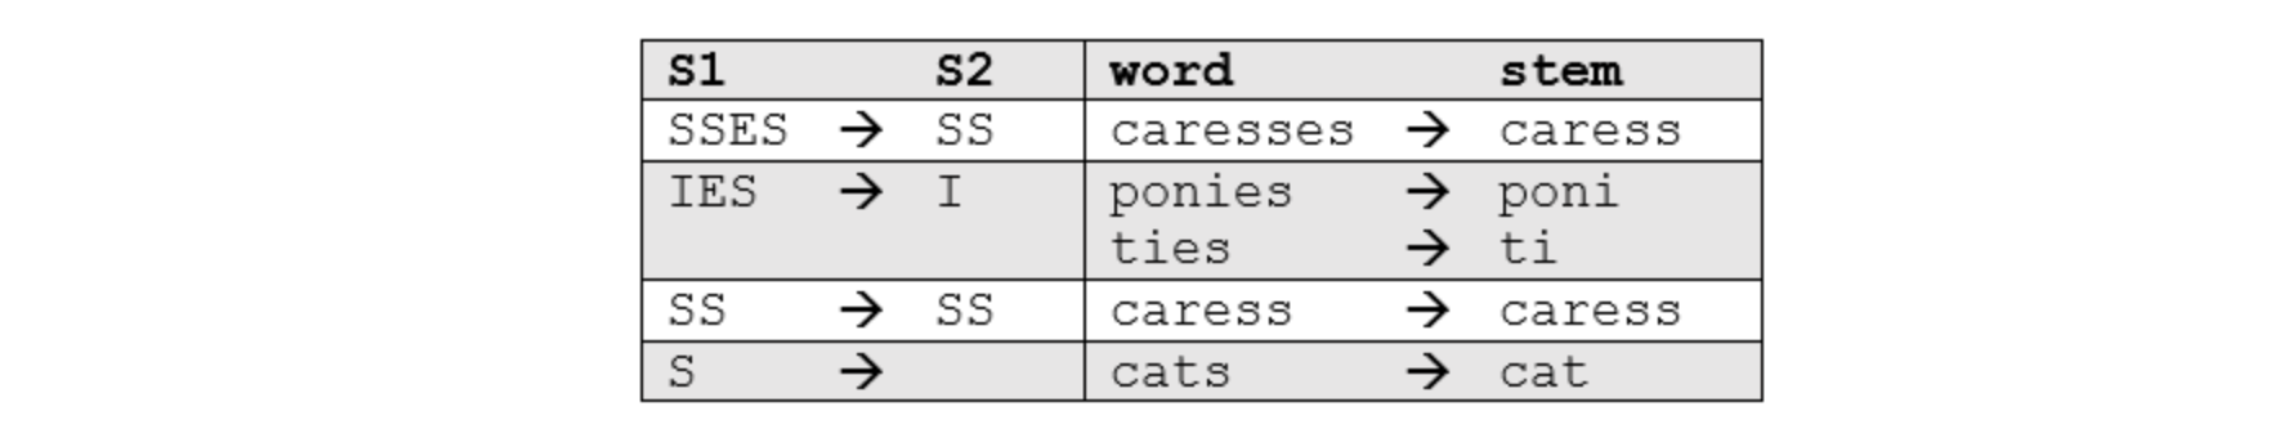

From a given set of stemming rules only one rule is applied, based on the longest suffix S1. Thus, `caresses` reduces to `caress` but not `cares`.

More sophisticated phases consider the length/complexity of the word before applying a rule. For example:

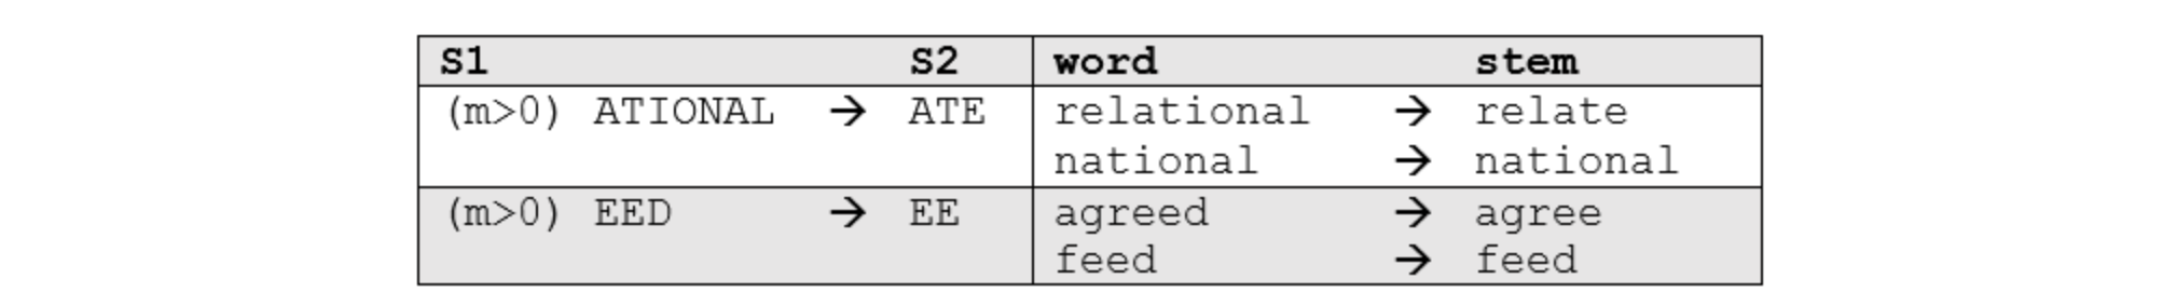

Here `m>0` describes the "measure" of the stem, such that the rule is applied to all but the most basic stems.

In [30]:
# Import the toolkit and the full Porter Stemmer library
import nltk
from nltk.stem.porter import *

p_stemmer = PorterStemmer()
words = ['run','runner','running','ran','runs','easily','fairly']
for word in words:
    print(word + ' ---> ' + p_stemmer.stem(word))

run ---> run
runner ---> runner
running ---> run
ran ---> ran
runs ---> run
easily ---> easili
fairly ---> fairli


<font color=green>Note how the stemmer recognizes "runner" as a noun, not a verb form or participle. Also, the adverbs "easily" and "fairly" are stemmed to the unusual root "easili" and "fairli"</font>
___

#### <font color='#fd79a8'> Snowball Stemmer<font/>

This is somewhat of a misnomer, as Snowball is the name of a stemming language developed by Martin Porter. The algorithm used here is more acurately called the "English Stemmer" or "Porter2 Stemmer". It offers a slight improvement over the original Porter stemmer, both in logic and speed. Since **nltk** uses the name SnowballStemmer, we'll use it here.

In [31]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

words = ['run','runner','running','ran','runs','easily','fairly']
# words = ['generous','generation','generously','generate']

for word in words:
    print(word+' --> '+s_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair


<font color=green>In this case the stemmer performed the same as the Porter Stemmer, with the exception that it handled the stem of "fairly" more appropriately with "fair"</font>

In [32]:
stemmer = SnowballStemmer('english')
print(stemmer.stem('sandwichlessly'))
print(stemmer.stem('sandwiches'))

sandwichless
sandwich


In [33]:
words = ['consolingly']

print('Porter Stemmer:')
for word in words:
    print(word+' --> '+p_stemmer.stem(word))
    
print('Porter2 Stemmer:')
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

Porter Stemmer:
consolingly --> consolingli
Porter2 Stemmer:
consolingly --> consol


___
Stemming has its drawbacks. If given the token `saw`, stemming might always return `saw`, whereas lemmatization would likely return either `see` or `saw` depending on whether the use of the token was as a verb or a noun. As an example, consider the following:

In [53]:
phrase = 'I am meeting him tomorrow at the meeting'
phrase = 'I test drove one and never looked back'
for word in phrase.split():
    print(word+' --> '+p_stemmer.stem(word))

I --> i
test --> test
drove --> drove
one --> one
and --> and
never --> never
looked --> look
back --> back


Here the word "meeting" appears twice - once as a verb, and once as a noun, and yet the stemmer treats both equally.

### <font color=blue>Lemmatizing</font>
In contrast to stemming, lemmatization looks beyond word reduction, and considers a language's full vocabulary to apply a *morphological analysis* to words. The lemma of 'was' is 'be' and the lemma of 'mice' is 'mouse'. Further, the lemma of 'meeting' might be 'meet' or 'meeting' depending on its use in a sentence.

<font color=green>In the above sentence, `running`, `run` and `ran` all point to the same lemma `run` (...11841) to avoid duplication.</font>

In [35]:
def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma_}')

doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today")
for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

print()    
doc2 = nlp(u"I saw eighteen mice today!")
show_lemmas(doc2)

print()    
doc3 = nlp(u"I am meeting him tomorrow at the meeting.")
show_lemmas(doc3)

I 	 PRON 	 4690420944186131903 	 I
am 	 AUX 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 SCONJ 	 16950148841647037698 	 because
I 	 PRON 	 4690420944186131903 	 I
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 SCONJ 	 10066841407251338481 	 since
I 	 PRON 	 4690420944186131903 	 I
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today

I            PRON   I
saw          VERB   see
eighteen     NUM    eighteen
mice         NOUN   mouse
today        NOUN   today
!            PUNCT  !

I            PRON   I
am           AUX    be
meeting      VERB   meet
him          PRON   he
tomorrow     NOUN   tomorrow
at           ADP    at
the          DET    the
meeti

<font color=green>Here the lemma of `meeting` is determined by its Part of Speech tag.</font>

In [65]:
doc4 = nlp(u"That's an enormous automobile")


show_lemmas(doc4)

I            PRON   I
test         AUX    test
drove        VERB   drive
one          NUM    one
and          CCONJ  and
never        ADV    never
looked       VERB   look
back         ADV    back


<font color=green>Note that lemmatization does *not* reduce words to their most basic synonym - that is, `enormous` doesn't become `big` and `automobile` doesn't become `car`.</font>

We should point out that although lemmatization looks at surrounding text to determine a given word's part of speech, it does not categorize phrases. In an upcoming lecture we'll investigate *word vectors and similarity*.

In [68]:
doc = nlp('I test drove one and never looked back')
print(doc)

[word.lemma_  for word in doc]

I test drove one and never looked back


['I', 'test', 'drive', 'one', 'and', 'never', 'look', 'back']

In [74]:
doc = nlp('I test drove one and never looked back')
lst_text = text.split()
lst_text = [word.lemma_  for word in doc]    

In [37]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text(doc4)

'that be an enormous automobile'

### <font color=blue>Vocabulary and Matching</font>

So far we've seen how a body of text is divided into tokens, and how individual tokens are parsed and tagged with parts of speech, dependencies and lemmas.

In this section we will identify and label specific phrases that match patterns we can define ourselves. 

#### Rule-based Matching

spaCy offers a rule-matching tool called `Matcher` that allows you to build a library of token patterns, then match those patterns against a Doc object to return a list of found matches. You can match on any part of the token including text and annotations, and you can add multiple patterns to the same matcher.

In [41]:
# Import the Matcher library
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

<font color=green>Here `matcher` is an object that pairs to the current `Vocab` object. We can add and remove specific named matchers to `matcher` as needed.</font>

#### Creating patterns

In literature, the phrase 'solar power' might appear as one word or two, with or without a hyphen. In this section we'll develop a matcher named 'SolarPower' that finds all three:

In [42]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'LOWER': 'power'}]
pattern3 = [{'LOWER': 'solar'}, {'IS_PUNCT': True}, {'LOWER': 'power'}]

#matcher.add('SolarPower', None, pattern1, pattern2, pattern3)

Let's break this down:
* `pattern1` looks for a single token whose lowercase text reads 'solarpower'
* `pattern2` looks for two adjacent tokens that read 'solar' and 'power' in that order
* `pattern3` looks for three adjacent tokens, with a middle token that can be any punctuation.<font color=green>*</font>

<font color=green>\* Remember that single spaces are not tokenized, so they don't count as punctuation.</font>
<br>Once we define our patterns, we pass them into `matcher` with the name 'SolarPower', and set *callbacks* to `None` (more on callbacks later).

#### Apply the matcher to a Doc object

In [43]:
doc = nlp(u'The Solar Power industry continues to grow as demand \
for solarpower increases. Solar-power cars are gaining popularity.')

In [44]:
found_matches = matcher(doc)
print(found_matches)

[]


`matcher` returns a list of tuples. Each tuple contains an ID for the match, with start & end tokens that map to the span `doc[start:end]`

In [45]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

The `match_id` is simply the hash value of the `string_ID` 'SolarPower'

TBC: http://localhost:8888/notebooks/OneDrive/00-DataAnalytics/01-ML/13-NLP/01-NLP-Python-Basics/05-Vocabulary-and-Matching.ipynb

 ## <font color=red>3.  Define common function </font>

### <font color=blue>Sample code for normalize text</font>

In [46]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}


def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text


def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text


def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text


def remove_stopwords(text, is_lower_case=False):
    stopword_list = nltk.corpus.stopwords.words('english')
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters    
        if special_char_removal:
            doc = remove_special_characters(doc)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus


### <font color=blue>Sample code for normalize text</font>

In [75]:
def normalize_text(text, flg_stemm=False, flg_lemm=False, lst_stopwords=None):
    
    # strip html tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    
    ## clean (convert to lowercase and remove punctuations and   characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    # Removing Special Characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    # non_ascii
    # text = "".join(i for i in s if ord(i)<128)
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        #lem = nltk.stem.wordnet.WordNetLemmatizer()
        #lst_text = [lem.lemmatize(word) for word in lst_text]
        lst_text = nlp(" ".join(lst_text))
        lst_text = [word.lemma_  for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [76]:
document = """<p>Héllo! Héllo! can you hear me! I just heard about <b>Python</b>!<br/>\r\n 
              It's an amazing language which can be used for Scripting, Web development,\r\n\r\n
              Information Retrieval, Natural Language Processing, Machine Learning & Artificial Intelligence!\n
              What are you waiting for? Go and get started.<br/> He's learning, she's learning, they've already\n\n
              got a headstart!</p>
           """
document

normalize_corpus([document], text_lemmatization=False, stopword_removal=False, text_lower_case=False)

normalize_corpus([document])

['hello hello hear I I hear python amazing language use scripting web development information retrieval natural language processing machine learning artificial intelligence wait go get start learn learn already get headstart']

After this step, each document is in the lowercase, special symbols have been removed and stopwords (words which carry little meaning like articles, pronouns, etc.) have been removed. We can now engineer features from this preprocessed corpus.

### <font color=blue>Applying</font>

In [102]:
lst_stopwords = nltk.corpus.stopwords.words("english")
corpus_df['text_clean'] = corpus_df['Document'].apply(lambda x: normalize_text(x, flg_stemm=True, flg_lemm=True, lst_stopwords=lst_stopwords))

corpus_df

,Document,Category,text_clean
0,Best car on this planet,car,good car planet
1,I test drove one and never looked back,car,test drive one never look back
2,"The shrimp tasty, tender and moist.",restaurant,shrimp tasti tender moist
3,Not much seafood and like 5 strings of pasta a...,restaurant,much seafood like stre pasta bottom
4,The only thing I did like was the prime rib an...,restaurant,thing like prime rib dessert section
5,The salad had just the right amount of sauce t...,restaurant,salad right amount sauc power scallop perfectl...
6,Awesome car for awesome people,car,awesom car awesom peopl
7,their cafe serves really good food.,restaurant,cafe serv realli good food
8,Everything was fresh and delicious!,restaurant,everyth fresh delici
9,One of the best cars I have ever driven,car,one good car ever drive


In [78]:
lst_stopwords = nltk.corpus.stopwords.words("english")
df['text_clean'] = df['text'].apply(lambda x: normalize_text(x, flg_stemm=True, flg_lemm=True, lst_stopwords=lst_stopwords))
df.head()

,category,headline,short_description,text,lang,text_clean
0,BUSINESS,"U.S. Launches Auto Import Probe, China Vows To...",The investigation could lead to new U.S. tarif...,"U.S. Launches Auto Import Probe, China Vows To...",en,we launch auto import probe china vow defend i...
1,BUSINESS,Starbucks Says Anyone Can Now Sit In Its Cafes...,The new policy was unveiled weeks after the co...,Starbucks Says Anyone Can Now Sit In Its Cafes...,en,starbuck say anyon sit cafe even without buy a...
2,BUSINESS,Seattle Passes Controversial New Tax On City's...,"Following the council vote, Amazon’s vice pres...",Seattle Passes Controversial New Tax On City's...,en,seattl pass controversi new tax citi big compa...
3,BUSINESS,Uber Ends Forced Arbitration In Individual Cas...,Victims will be free to go to court -- but a f...,Uber Ends Forced Arbitration In Individual Cas...,en,uber end forc arbitr individu case sexual assa...
4,BUSINESS,"Chili's Hit By Data Breach, Credit And Debit C...",The breach is believed to have occurred betwee...,"Chili's Hit By Data Breach, Credit And Debit C...",en,chili hit datum breach credit debit card infor...


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em;  font-size: 25px">FEATURE EXTRACTION/ TEXT TO FEATURES</div>

Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with. This section covers methods to turn a list of tokens (lemmas) into a vector that machine learning models can understand. There are 2 types of classes of methods for feature extraction are Statistical features and Semantic features

  + Statistical features: Sparse Document Representations
    + Bag-of-Words
    + N-Grams    
    + TF-IDF
  + Semantic features: Word Embeddings/ Dense Representations
    + CBOW (Continuous bag-of-words)
    + Count based Embeddings - GloVe
    + Dense Representations - Word2Vec
    + Training Embeddings useing Gensim and Visualization

 ## <font color=red>1. Bag-of-Words model or Count Vectorizer </font>

### <font color=blue>Overview</font>
This is perhaps one of the simplest yet effective schemes of vectorizing features from unstructured text. The core principle of this model is to convert text documents into numeric vectors by counting frequency of the word occuring in the doc. The dimension or size of each vector is N where N indicates all possible distinct words across the corpus of documents. Each document once transformed is a numeric vector of size N where the values or weights in the vector indicate the frequency of each word in that specific document.  
 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [79]:
corpus_df

,Document,Category,text_clean
0,Best car on this planet,car,good car planet
1,I test drove one and never looked back,car,test drive one never look back
2,"The shrimp tasty, tender and moist.",restaurant,shrimp tasti tender moist
3,Not much seafood and like 5 strings of pasta a...,restaurant,much seafood like stre pasta bottom
4,The only thing I did like was the prime rib an...,restaurant,thing like prime rib dessert section
5,Driving the Future,car,drive futur
6,The salad had just the right amount of sauce t...,restaurant,salad right amount sauc power scallop perfectl...
7,Awesome car for awesome people,car,awesom car awesom peopl
8,their cafe serves really good food.,restaurant,cafe serv realli good food
9,Everything was fresh and delicious!,restaurant,everyth fresh delici


### <font color=blue>Transform</font>

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0, max_df=1.)
cv_matrix = cv.fit_transform(corpus_df['text_clean'])
cv_matrix = cv_matrix.toarray()

vocab = cv.get_feature_names()
cv_df = pd.DataFrame(cv_matrix, columns=vocab)
cv_df

,amount,awesom,back,bottom,cafe,car,cook,delici,dessert,drive,ever,everyth,food,fresh,futur,good,like,look,moist,much,never,one,pasta,peopl,perfectli,planet,power,prime,realli,rib,right,salad,sauc,scallop,seafood,section,serv,shrimp,stre,tasti,tender,test,thing
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0
7,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
# Print total number of vocab words
print(len(cv.vocabulary_))

cv.vocabulary_

43


{'good': 15,
 'car': 5,
 'planet': 25,
 'test': 41,
 'drive': 9,
 'one': 21,
 'never': 20,
 'look': 17,
 'back': 2,
 'shrimp': 37,
 'tasti': 39,
 'tender': 40,
 'moist': 18,
 'much': 19,
 'seafood': 34,
 'like': 16,
 'stre': 38,
 'pasta': 22,
 'bottom': 3,
 'thing': 42,
 'prime': 27,
 'rib': 29,
 'dessert': 8,
 'section': 35,
 'futur': 14,
 'salad': 31,
 'right': 30,
 'amount': 0,
 'sauc': 32,
 'power': 26,
 'scallop': 33,
 'perfectli': 24,
 'cook': 6,
 'awesom': 1,
 'peopl': 23,
 'cafe': 4,
 'serv': 36,
 'realli': 28,
 'food': 12,
 'everyth': 11,
 'fresh': 13,
 'delici': 7,
 'ever': 10}

Let's take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer

In [85]:
txt = corpus_df['text_clean'][7]
txt

'awesom car awesom peopl'

Now let's see its vector reprensentation

In [86]:
bow_txt = cv.transform([txt])
print(bow_txt)

  (0, 1)	2
  (0, 5)	1
  (0, 23)	1


This means that there are 3 unique words in message number 7 (after removing common stop words). 'awesome' appear twice, the rest only once. Let's go ahead and check and confirm which onces appear twice:

In [87]:
print(cv.get_feature_names()[1])

awesom


Now we can use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix

In [88]:
messages_bow = cv.transform(corpus_df['text_clean'])

print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (11, 43)
Amount of Non-Zero occurences:  51


In [89]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 11


We can clearly see now that each row of the dataframe depicts the term frequency vector for each text document. Hence the name of bag of words because this model represents unstructured text into a bag of words without taking into account word positions, syntax, or semantics

 ## <font color=red>2. Bag of N-Grams Model </font>

### <font color=blue>Overview</font>
We have used single word terms as features in the above mentioned bag of words model. But what if we also wanted to take into account phrases or collection of words which occur in a sequence? N-grams help us achieve that. An n-gram is basically a collection of word tokens from a text document such that these tokens are contiguous and occur in a sequence. Bi-grams indicate n-grams of order 2 (two words), Tri-grams indicate n-gram of order 3 (three words), and so on. We can easily extend the bag of words model to use a bag o n-grams model to give us n-gram based feature vectors.

The following code computes bi-gram based features on our corpus

### <font color=blue>Transform</font>

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(corpus_df['text_clean'])
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,amount sauc,awesom car,awesom peopl,cafe serv,car awesom,car ever,car planet,dessert section,drive futur,drive one,ever drive,everyth fresh,fresh delici,good car,good food,like prime,like stre,look back,much seafood,never look,one good,one never,pasta bottom,perfectli cook,power scallop,prime rib,realli good,rib dessert,right amount,salad right,sauc power,scallop perfectli,seafood like,serv realli,shrimp tasti,stre pasta,tasti tender,tender moist,test drive,thing like
0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0
7,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
bv.get_feature_names()[0:5]

['amount sauc', 'awesom car', 'awesom peopl', 'cafe serv', 'car awesom']

In [92]:
sorted(bv.vocabulary_.keys())[0:5]

['amount sauc', 'awesom car', 'awesom peopl', 'cafe serv', 'car awesom']

 ## <font color=red>3. Feature Extraction with Tf-idf </font>
 
### <font color=blue>Overview</font>

**Limitation of BOW**: There are some potential problems which might arise with the Bag of Words model when it is used on large coropora. Since the feaature vectors are based on absolute term frequencies, there might be some terms which occur frequently across all documents and these will tend to overshadow other terms in the feature set. 


**TF-IDF**: TF-IDF stands for Term Frequency-Inverse Document Frequency. The TF-IDF model tries to combat this issue by using a scaling or normalizing factor as a weight to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the entire corpus (or all the docs). 

Mathematically, we can define TF-IDF as tfidf = tf x idf, which can be expanded further to be represented as follows

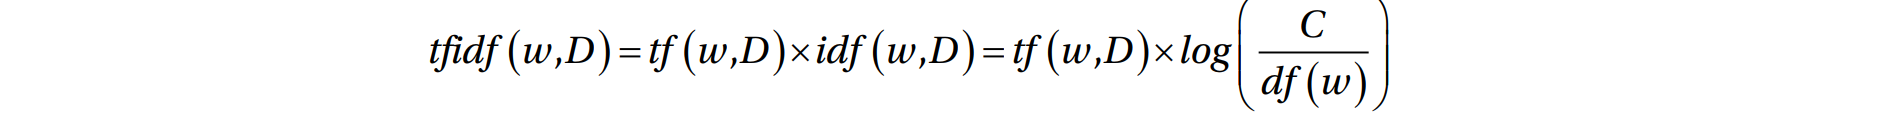

+ tfidf(w, D): is the TF-IDF score/weigth for word w in document D. It measure the importance to that keyword based on the number of times it appears in the document. Put simply, the higher the Tf*Idf score (weight), the rarer and more important the term, and vice versa

+ tf(w, D) : TF measures how frequently a term w occurs in a document D. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization

+ idf(w, D) is the inverse document frequency for the term w, which can be computed as the log transform of the toal number of documents in the corpus C divided by the document frequency of the word w, which is basically the frequency of documents in the corpus where the word w occurs. 

**EX**:

Vocabulary:
```
['drop', 'help', 'jeff', 'octopus', 'police', 'said', 'sandwich', 'sandwichlessly', 'sobbed', 'stole']
```

TF: 
```
['jeff', 'stole', 'octopus', 'sandwich']
[0, 0, 1/4, 1/4, 0, 0, 1/4, 0, 0, 1/4]

['help', 'sobbed', 'sandwichlessly']
[0, 1/3, 0, 0, 0, 0, 0, 1/3, 1/3, 0]

['drop', u'sandwich', 'said', 'sandwich', 'police']
[1/5, 0, 0, 0, 1/5, 1/5, 2/5, 0, 0, 0]
```


DF for each word:
```
[1/3, 1/3, 1/3, 1/3, 1/3, 1/3, 2/3, 1/3, 1/3, 1/3]
```

IDF for each word:
```
[1.099, 1.099, 1.099, 1.099, 1.099, 1.099, 0.405, 1.099, 1.099, 1.099]
```

TFIDF = TF * IDF:
```
['jeff', 'stole', 'octopus', 'sandwich']
[0, 0, 0.275, 0.275, 0, 0, 0.101, 0, 0, 0.275]

['help', 'sobbed', 'sandwichlessly']
[0, 0.366, 0, 0, 0, 0, 0, 0.366, 0.366, 0]

['drop', u'sandwich', 'said', 'sandwich', 'police']
[0.22, 0, 0, 0, 0.22, 0.22, 0.162, 0, 0, 0]
```

### <font color=blue>Transform</font>

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_corpus = tv.fit_transform(corpus_df['text_clean'] )
tv_corpus = tv_corpus.toarray()
vocab = tv.get_feature_names()
tv_df = pd.DataFrame(np.round(tv_corpus, 2), columns=vocab)
tv_df

,amount,awesom,back,bottom,cafe,car,cook,delici,dessert,drive,ever,everyth,food,fresh,futur,good,like,look,moist,much,never,one,pasta,peopl,perfectli,planet,power,prime,realli,rib,right,salad,sauc,scallop,seafood,section,serv,shrimp,stre,tasti,tender,test,thing
0,0.000,0.000,0.000,0.000,0.000,0.520,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.520,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.690,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.430,0.000,0.000,0.000,0.000,0.000,0.000,0.330,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.430,0.000,0.000,0.430,0.370,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.430,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.500,0.000,0.500,0.500,0.000,0.000
3,0.000,0.000,0.000,0.420,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.360,0.000,0.000,0.420,0.000,0.000,0.420,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.420,0.000,0.000,0.000,0.420,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.420,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.360,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.420,0.000,0.420,0.000,0.000,0.000,0.000,0.000,0.420,0.000,0.000,0.000,0.000,0.000,0.000,0.420
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.600,0.000,0.000,0.000,0.000,0.800,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.350,0.000,0.000,0.000,0.000,0.000,0.350,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.350,0.000,0.350,0.000,0.000,0.000,0.350,0.350,0.350,0.350,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.000,0.850,0.000,0.000,0.000,0.320,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.420,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,0.000,0.000,0.000,0.000,0.470,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.470,0.000,0.000,0.350,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.470,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.470,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.580,0.000,0.000,0.000,0.580,0.000,0.580,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


 ## <font color=red>4. Word Embedding </font>
 
### <font color=blue>Overview</font> 

1. Word embedding is applied to transform each word to a numeric vector. Each word is assigned its own vector in such a way that words that frequently appear together in the same context are given vectors that are close together. So similar meaning words have similar representations, these vectors try to capture contextual and semantic information. Hence, a word embedding not only converts the word but also identifies the semantics and syntaxes of the world to build a vector representation of this information. The underlying concept is to use information from the words adjacent to the word.  

2. For example, the word for “lion” will be closer in value to “cat” than to “dandelion”
    
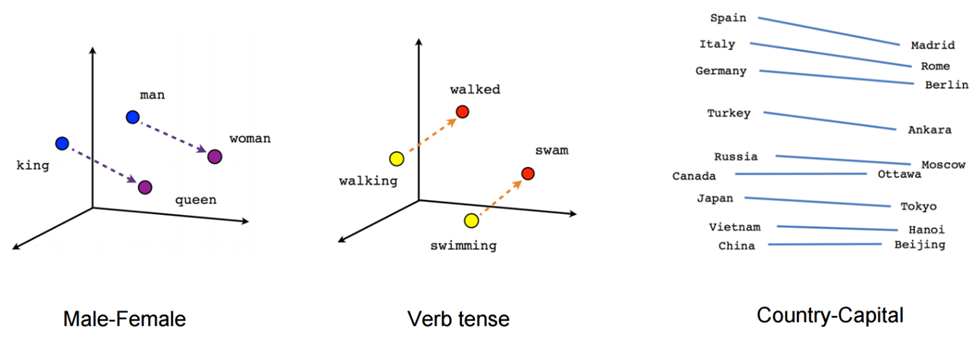
    
3. Some popular word embedding techniques include Word2Vec, GloVe, ELMo, FastText, etc    

### <font color='blue'>**Word embedding using Gensim Framework**
We will be using genism framework to implement the same model on our corpus to extract features. Some of the important parameters in the model are explained briefly as follows
+ Size: Represents the feature vector size for each word in the corpus when transformed
+ Window: Sets the context window size specifying the length of the window of words to be taken into account as belonging to a single, similar context when training
+ Min_count: Specifies the minimum word frequency value needed across the corpus to consider the word as a part of the final vocabulary during training the model
+ Sample: Used to downsample the effects of words which occur very frequently


### <font color=blue>Apply to review data</font>

#### <font color='#fd79a8'> Feature Extraction<font/>

In [133]:
from gensim.models import word2vec

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in corpus_df['text_clean']]

# Set values for various parameters
feature_size = 300    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

tokenized_corpus = []
for words in df['text_clean']:
    tokenized_corpus.append(words.split())
    
pretrained_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count = min_word_count,
                          sample=sample)


In [135]:
pretrained_model = Word2Vec(size=feature_size, window=window_context, min_count=min_word_count, workers=-1)
pretrained_model.build_vocab(tokenized_corpus)

In [136]:
pretrained_model.similarity('fruit','tast'),pretrained_model.similarity('fruit','train'),  pretrained_model.similarity('train','travel')

(0.028210137, -0.032075852, 0.010989786)

A question might arise in your mind now that so far, we had feature vectors for each complete document, but now we have vectors for each word. How on earth do we represent entire documents now?

We can do that using various aggregation and combinations. A simple scheme would be to use an averaged word vector representation, where we simply sum all the word vectors occurring in a document and then divide by the count of word vectors to represent an averaged word vector for the document. 

The following code enables us to do the same

In [137]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    #vocabulary = list(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model.wv, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

Thus, we have our averaged word vector based feature set for all our corpus documents, as depicted by the dataframe in Figure 4-19. Let’s use a different clustering algorithm this time known as Affinity Propagation to try to cluster our documents based on these new features. Affinity Propagation is based on the concept of message passing and you do not need to specify the number of clusters beforehand like you did in K-means clustering.

In [139]:
w2v_feature_array = averaged_word_vectorizer(corpus=df['text_clean'], model=pretrained_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.000,0.000,-0.000,0.000,0.000,0.001,-0.001,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.001,0.000,-0.000,0.000,-0.001,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.001,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.001,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.001,-0.000,0.000,0.000,-0.000,0.000,-0.001,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.001,-0.000,0.000,-0.000,0.000,0.001,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.001,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.001,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.001,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.001,0.000,0.000,0.000,-0.000,0.000,0.001,-0.000,0.000,-0.000,0.000,-0.001,0.000,0.000,0.000,-0.000,-0.001,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.001,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.001,-0.000,0.001,-0.000,0.000,-0.000,0.001,-0.001,0.000,-0.000,-0.000,0.000,0.001,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.001,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000
1,0.000,-0.000,0.000,0.000,0.000,0.001,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.001,-0.000,0.000,-0.001,0.000,-0.001,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.001,0.001,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.001,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.001,-0.001,-0.000,-0.000,-0.000,-0.000,0.000,-0.001,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.001,-0.000,0.000,-0.000,0.000,0.001,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.

### <font color='blue'>**Word Embedding using Google's Word2vec Pretrained Word Embedding**
    
1. The word2vec model was released by Google in 2013 and uses a neural network based implementation with architectures like continuous Bag of Words and Skip-Grams to learn the distributed vector representation of words in a corpus. This part employes the Word2vec model which was released by Google in 2013 and trained on the Google News dataset (about 100 billion words). It uses a neural network based implementation with architectures like continuous Bag of Words and Skip-Grams to learn the distributed vector representation of words in a corpus

2. Depending on the way the embeddings are learned, Word2Vec is classified into two approaches: Continuous Bag-of-Words (CBOW) model learns the focus word given the neighboring words whereas the Skip-gram model learns the neighboring words given the focus word. That’s why Continuous Bag Of Words and Skip-gram are inverses of each other
    
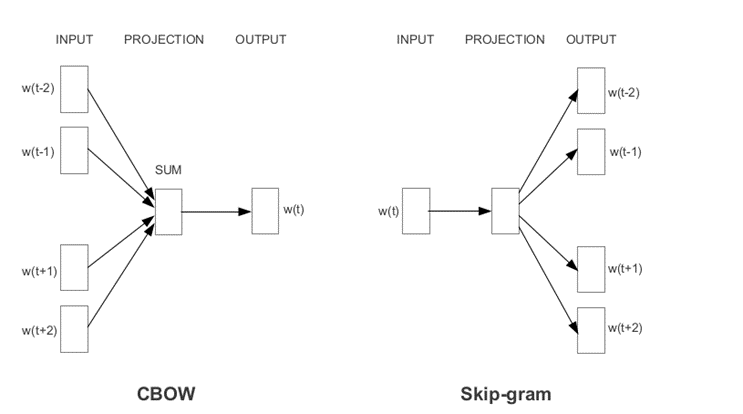

In [140]:
EMBEDDING_FILE = r'C:\Users\Mai\OneDrive\02-PProjects\DataAnalysticsTool\GoogleNews-vectors-negative300.bin.gz'
pretrained_model.intersect_word2vec_format(EMBEDDING_FILE, lockf=1.0, binary=True)
pretrained_model.train(tokenized_corpus, total_examples=pretrained_model.corpus_count, epochs=5)

(0, 0)

In [141]:
pretrained_model.similarity('fruit','tast'),pretrained_model.similarity('fruit','train'),  pretrained_model.similarity('train','travel')

(0.26713616, 0.05175046, 0.29063696)

In [142]:
pretrained_model.similarity('king','man'),pretrained_model.similarity('king','cat'),  pretrained_model.similarity('king','pen')

(0.22942673, 0.12161587, 0.08757986)

In [143]:
pretrained_model.similarity('train','cat'),pretrained_model.similarity('train','travel'),  pretrained_model.similarity('dog','cat')

(0.08540114, 0.29063696, 0.76094574)

Now in order to create features to represent entire document (field text_clean), we can combine all words in the document by averaging word vector representation, where we simply sum all the word vectors occurring in a document and then divide by the count of word vectors to represent an averaged word vector for the document. After this step, we can use these features to build classification or clustering models

In [144]:
def vectorize(corpus, model):
    # global embeddings
    embeddings = []
    for line in corpus:
        w2v = None
        count = 0
        for word in line.split():
            if word in model.wv.vocab:
                count += 1
                if w2v is None:
                    w2v = model.wv[word]
                else:
                    w2v = w2v + pretrained_model.wv[word]
        if w2v is not None:
            w2v = w2v / count
            # append element to the end of the embeddings list
            embeddings.append(w2v)
        
    return embeddings

In [145]:
embeddings = vectorize(df['text_clean'], pretrained_model)
embeddings_df = pd.DataFrame(embeddings)
print(embeddings_df.shape)
embeddings_df.head()

(24891, 300)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.003,0.153,-0.023,0.071,-0.029,-0.030,0.087,-0.108,0.033,0.130,-0.045,-0.044,-0.059,-0.049,-0.130,0.036,0.053,0.089,-0.009,-0.038,0.001,0.053,0.081,-0.036,0.065,0.070,-0.048,-0.012,0.041,0.037,-0.053,-0.010,-0.008,-0.018,-0.021,-0.022,0.001,0.015,0.051,0.043,0.053,-0.045,0.118,-0.029,-0.072,-0.102,-0.033,0.055,-0.066,0.024,0.083,-0.001,-0.011,0.033,0.040,0.000,-0.104,-0.077,0.002,-0.045,-0.071,-0.001,-0.129,-0.035,-0.068,-0.011,-0.135,0.071,-0.020,0.092,0.020,-0.041,0.080,-0.072,-0.198,-0.100,-0.004,0.080,0.031,-0.040,0.049,-0.085,-0.001,-0.012,0.035,-0.024,-0.124,0.077,-0.058,0.068,0.006,-0.006,-0.009,-0.022,-0.004,-0.105,0.010,-0.038,0.124,-0.034,0.007,-0.046,0.029,-0.043,-0.011,-0.045,-0.046,0.003,0.068,0.020,-0.100,-0.046,-0.129,0.040,0.041,0.076,-0.022,-0.014,0.099,0.073,0.032,0.019,-0.103,0.036,0.003,-0.059,0.003,-0.087,-0.012,0.015,-0.024,-0.014,-0.039,-0.073,0.002,0.014,-0.009,0.021,-0.047,0.024,0.072,-0.067,-0.050,0.067,0.088,-0.012,0.021,0.003,-0.121,-0.040,0.139,-0.107,0.004,0.001,0.006,-0.058,-0.081,-0.050,0.002,-0.073,-0.053,0.035,0.031,-0.056,-0.045,-0.063,0.068,-0.032,0.006,-0.003,-0.087,-0.023,0.010,-0.056,0.027,-0.099,0.058,-0.124,-0.052,-0.031,-0.113,-0.067,-0.011,-0.008,0.053,-0.044,0.041,0.058,0.094,-0.022,-0.021,0.021,-0.006,0.070,-0.063,0.005,0.009,-0.066,-0.021,-0.092,-0.008,0.006,0.019,-0.048,-0.010,-0.008,0.026,-0.106,0.043,-0.014,-0.056,0.103,0.025,0.081,-0.063,-0.012,0.108,-0.031,-0.070,0.024,-0.068,0.006,-0.113,0.045,0.046,-0.141,0.040,0.071,0.135,0.036,0.002,0.036,-0.060,0.081,0.046,-0.086,-0.011,-0.032,0.075,-0.021,-0.048,0.028,-0.022,0.021,-0.088,-0.006,-0.009,0.033,0.027,-0.051,0.079,0.065,0.037,-0.017,-0.059,0.002,0.059,-0.061,-0.003,-0.062,0.036,-0.013,-0.005,0.021,0.096,0.039,-0.057,-0.059,-0.024,0.018,0.064,0.063,0.088,0.015,0.078,-0.035,-0.054,-0.091,-0.056,0.053,-0.038,0.017,0.023,0.015,-0.001,-0.051,-0.159,0.037,0.009,0.002,-0.024,-0.027,-0.044,0.020,-0.015,-0.001,0.021,-0.003,-0.041,-0.103
1,0.039,-0.006,-0.002,0.054,-0.025,-0.031,0.010,-0.054,0.085,0.101,-0.035,-0.052,-0.058,-0.009,-0.088,0.082,0.011,0.054,-0.012,-0.037,-0.030,0.015,-0.022,-0.042,0.003,-0.009,-0.015,0.053,0.022,-0.030,-0.008,0.037,-0.061,-0.032,-0.043,0.002,0.007,-0.063,-0.005,0.048,0.006,-0.026,0.065,0.005,-0.013,-0.022,-0.065,-0.009,-0.028,0.076,0.001,0.036,0.024,-0.044,0.031,-0.001,-0.045,-0.035,0.041,-0.036,-0.014,0.037,-0.041,-0.018,0.015,-0.037,-0.061,0.007,-0.015,0.049,0.047,0.100,0.032,0.041,-0.094,-0.016,0.050,0.070,-0.000,0.039,0.048,-0.077,0.018,-0.007,-0.022,-0.023,-0.092,0.054,0.014,0.000,0.025,0.009,-0.041,-0.070,-0.017,-0.032,0.035,0.037,-0.008,-0.012,-0.024,-0.070,0.039,-0.004,0.033,-0.061,0.048,-0.008,-0.012,-0.083,-0.014,0.017,0.008,-0.042,0.038,-0.071,0.027,-0.048,0.031,0.030,0.015,0.002,-0.069,0.036,0.029,-0.044,0.028,-0.014,0.049,0.036,0.045,-0.042,0.014,0.035,-0.025,-0.003,0.000,0.025,-0.034,0.039,0.069,-0.070,-0.016,-0.018,0

### <font color=blue>Scaling data</font>

In [146]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
embeddings_df = pd.DataFrame(scaler.fit_transform(embeddings_df), columns = range(0, 300))

embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.475,0.721,0.383,0.365,0.447,0.320,0.635,0.467,0.535,0.570,0.443,0.730,0.437,0.384,0.414,0.361,0.596,0.510,0.510,0.624,0.431,0.428,0.515,0.494,0.610,0.659,0.594,0.275,0.479,0.633,0.439,0.358,0.506,0.496,0.555,0.560,0.360,0.610,0.502,0.397,0.589,0.558,0.493,0.346,0.325,0.478,0.590,0.621,0.314,0.421,0.794,0.315,0.433,0.583,0.635,0.560,0.377,0.404,0.570,0.541,0.348,0.401,0.305,0.443,0.286,0.620,0.388,0.752,0.439,0.498,0.392,0.303,0.625,0.309,0.397,0.345,0.646,0.650,0.584,0.404,0.685,0.484,0.437,0.574,0.551,0.413,0.340,0.432,0.351,0.553,0.552,0.512,0.515,0.535,0.516,0.403,0.430,0.331,0.639,0.542,0.683,0.382,0.410,0.391,0.495,0.538,0.316,0.504,0.600,0.692,0.327,0.450,0.301,0.495,0.386,0.711,0.389,0.591,0.731,0.668,0.646,0.534,0.360,0.578,0.345,0.496,0.586,0.273,0.378,0.415,0.698,0.566,0.609,0.260,0.575,0.407,0.538,0.450,0.309,0.339,0.474,0.548,0.408,0.659,0.635,0.540,0.522,0.556,0.420,0.555,0.553,0.202,0.697,0.359,0.555,0.553,0.416,0.398,0.828,0.413,0.429,0.651,0.481,0.333,0.279,0.530,0.548,0.543,0.561,0.484,0.615,0.462,0.543,0.425,0.713,0.262,0.385,0.311,0.435,0.361,0.341,0.582,0.393,0.621,0.585,0.458,0.697,0.527,0.606,0.334,0.339,0.536,0.497,0.566,0.340,0.261,0.530,0.381,0.661,0.433,0.591,0.489,0.701,0.385,0.517,0.641,0.563,0.278,0.616,0.553,0.523,0.549,0.636,0.654,0.423,0.445,0.649,0.501,0.323,0.636,0.390,0.474,0.166,0.616,0.492,0.093,0.495,0.591,0.856,0.560,0.352,0.655,0.423,0.567,0.439,0.426,0.410,0.515,0.620,0.528,0.177,0.631,0.375,0.700,0.389,0.553,0.562,0.500,0.641,0.432,0.688,0.586,0.382,0.373,0.178,0.654,0.708,0.348,0.548,0.476,0.566,0.447,0.554,0.604,0.660,0.460,0.409,0.402,0.576,0.654,0.573,0.479,0.552,0.468,0.531,0.599,0.463,0.409,0.515,0.583,0.348,0.568,0.422,0.458,0.417,0.459,0.330,0.456,0.565,0.328,0.429,0.416,0.598,0.544,0.436,0.611,0.518,0.535,0.290,0.179
1,0.568,0.327,0.432,0.328,0.460,0.319,0.437,0.595,0.646,0.513,0.466,0.711,0.439,0.472,0.515,0.476,0.490,0.427,0.505,0.627,0.363,0.355,0.275,0.477,0.484,0.480,0.662,0.414,0.438,0.488,0.555,0.453,0.391,0.461,0.502,0.618,0.373,0.454,0.367,0.409,0.488,0.605,0.372,0.429,0.487,0.667,0.518,0.479,0.401,0.568,0.598,0.415,0.515,0.408,0.612,0.557,0.493,0.513,0.668,0.563,0.485,0.498,0.488,0.485,0.481,0.560,0.561,0.624,0.453,0.399,0.453,0.641,0.520,0.571,0.599,0.513,0.735,0.625,0.502,0.588,0.683,0.502,0.490,0.586,0.428,0.416,0.422,0.387,0.523,0.407,0.597,0.548,0.445,0.436,0.483,0.555,0.500,0.489,0.320,0.593,0.596,0.334,0.438,0.488,0.605,0.500,0.534,0.475,0.452,0.441,0.526,0.592,0.566,0.304,0.380,0.306,0.508,0.507,0.583,0.546,0.609,0.493,0.445,0.580,0.400,0.528,0.645,0.469,0.467,0.461,0.850,0.505,0.715,0.511,0.513,0.373,0.561,0.458,0.332,0.376,0.467,0.540,0.500,0.470,0.489,0.584,0.444,0.394,0.573,0.532,0.380,0.403,0.584,0.374,0.610,0.618,0.544,0.455,0.762,0.593,0.485,0.630,0.482,0.416,0.469,0.573,0.553,0.466,0.523,0.363,0.617,0.457,0.458,0.457,0.667,0.501,0.328,0.566,0.480,0.517,0.542,0.689,0.371,0.562,0

In [147]:
embeddings_df.shape

(24891, 300)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em;  font-size: 25px">INFORMATION RETRIEVAL & SPACY LIB</div>

 ## <font color=red>1. Spacy objects </font>
 
spaCy is an open-source Python library that parses and 'understands' large volumes of text. Separate models are available that cater to specific languages (English, French, German, etc.) 

After importing the spacy module in the cell above we loaded a **model** and named it `nlp`.<br>Next we created a **Doc** object by applying the model to our text, and named it `doc`.<br>spaCy also builds a companion **Vocab** object that we'll cover in later sections.<br>The **Doc** object that holds the processed text is our focus here.

In [78]:
# Import spacy and load the language library
import spacy
# !python -m spacy download en
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million')
# Print the full text:
print(doc.text)

# Print each token separately
print()
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.dep_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

Tesla is looking at buying U.S. startup for $6 million

Tesla      PROPN    nsubj    NNP    noun, proper singular
is         AUX      aux      VBZ    verb, 3rd person singular present
looking    VERB     ROOT     VBG    verb, gerund or present participle
at         ADP      prep     IN     conjunction, subordinating or preposition
buying     VERB     pcomp    VBG    verb, gerund or present participle
U.S.       PROPN    dobj     NNP    noun, proper singular
startup    VERB     dep      VBD    verb, past tense
for        ADP      prep     IN     conjunction, subordinating or preposition
$          SYM      quantmod $      symbol, currency
6          NUM      compound CD     cardinal number
million    NUM      pobj     CD     cardinal number


In [79]:
spacy.explain('PROPN')

'proper noun'

In [80]:
spacy.explain('nsubj')

'nominal subject'

This doesn't look very user-friendly, but right away we see some interesting things happen:
1. Tesla is recognized to be a Proper Noun, not just a word at the start of a sentence
2. U.S. is kept together as one entity (we call this a 'token')

As we dive deeper into spaCy we'll see what each of these abbreviations mean and how they're derived. We'll also see how spaCy can interpret the last three tokens combined `$6 million` as referring to ***money***.

### Syntax - the structure of language

It refers to the way words are arranged together. Words can group together - behave as a single unit or phrase. Constituents:

+ **Noun Phrase - PP**: Determiner (DET) + Nominal
+ **Verb Pharse - VP**: V + NP, V + PP, V + NP + PP
+ **Prepositional Phrase - PP**: P + NP
+ **Sentence - S**: [NP] + [VP] + [PP]

**Context Free Grammar**:

 ## <font color=red>3.2. Pipeline </font>
 
When we run `nlp`, our text enters a *processing pipeline* that first breaks down the text and then performs a series of operations to tag, parse and describe the data.   Image source: https://spacy.io/usage/spacy-101#pipelines

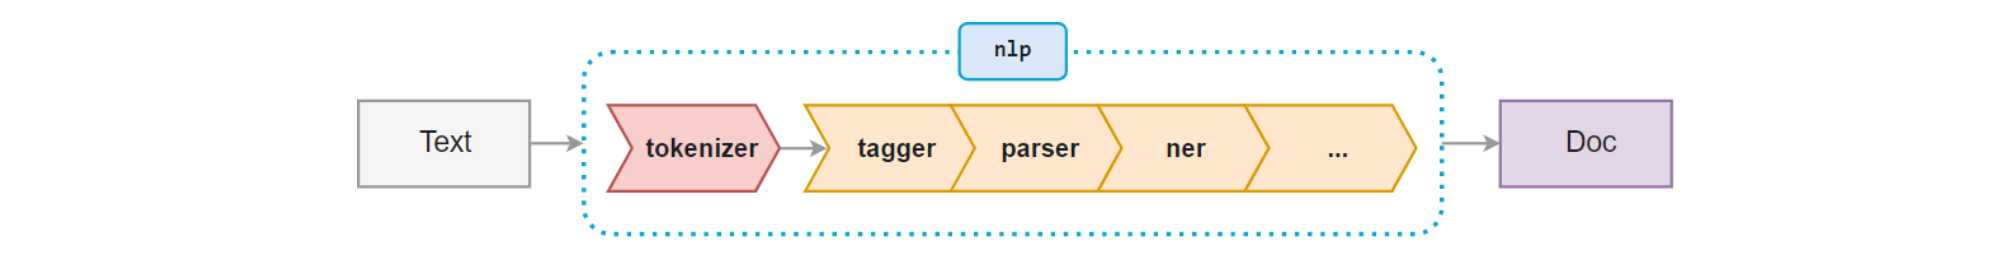

We can check to see what components currently live in the pipeline. In later sections we'll learn how to disable components and add new ones as needed.

In [81]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x233e19f1be0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x233e7cccbe0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x233e7c9e9e0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x233e72c3140>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x233e7b0e440>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x233e7510d60>)]

In [82]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

### <font color=blue>Tokenization</font>

Split up all the components parts (words & punctuations) into "tokens"

In [83]:
doc2 = nlp(u"Tesla isn't   looking into startups anymore.")

for token in doc2:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.dep_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

Tesla      PROPN    nsubj    NNP    noun, proper singular
is         AUX      aux      VBZ    verb, 3rd person singular present
n't        PART     neg      RB     adverb
           SPACE    dep      _SP    whitespace
looking    VERB     ROOT     VBG    verb, gerund or present participle
into       ADP      prep     IN     conjunction, subordinating or preposition
startups   NOUN     pobj     NNS    noun, plural
anymore    ADV      advmod   RB     adverb
.          PUNCT    punct    .      punctuation mark, sentence closer


Notice how `isn't` has been split into two tokens. spaCy recognizes both the root verb `is` and the negation attached to it. Notice also that both the extended whitespace and the period at the end of the sentence are assigned their own tokens.

It's important to note that even though `doc2` contains processed information about each token, it also retains the original text:

In [84]:
doc2, doc2[0], type(doc2)

(Tesla isn't   looking into startups anymore., Tesla, spacy.tokens.doc.Doc)

In [85]:
for token in doc2:
    print(token.text, end=' | ')

Tesla | is | n't |    | looking | into | startups | anymore | . | 

 ### <font color=blue>3.2. Part of Speech Tagging (POS) </font>
 
The next step after splitting the text up into tokens is to assign parts of speech. In the above example, `Tesla` was recognized to be a ***proper noun***. Here some statistical modeling is required. For example, words that follow "the" are typically nouns.

For a full list of POS Tags visit https://spacy.io/api/annotation#pos-tagging

#### Coarse-grained Part-of-speech Tags
Every token is assigned a POS Tag from the following list:


<table><tr><th>POS</th><th>DESCRIPTION</th><th>EXAMPLES</th></tr>
    
<tr><td>ADJ</td><td>adjective</td><td>*big, old, green, incomprehensible, first*</td></tr>
<tr><td>ADP</td><td>adposition</td><td>*in, to, during*</td></tr>
<tr><td>ADV</td><td>adverb</td><td>*very, tomorrow, down, where, there*</td></tr>
<tr><td>AUX</td><td>auxiliary</td><td>*is, has (done), will (do), should (do)*</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>*and, or, but*</td></tr>
<tr><td>CCONJ</td><td>coordinating conjunction</td><td>*and, or, but*</td></tr>
<tr><td>DET</td><td>determiner</td><td>*a, an, the*</td></tr>
<tr><td>INTJ</td><td>interjection</td><td>*psst, ouch, bravo, hello*</td></tr>
<tr><td>NOUN</td><td>noun</td><td>*girl, cat, tree, air, beauty*</td></tr>
<tr><td>NUM</td><td>numeral</td><td>*1, 2017, one, seventy-seven, IV, MMXIV*</td></tr>
<tr><td>PART</td><td>particle</td><td>*'s, not,*</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>*I, you, he, she, myself, themselves, somebody*</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>*Mary, John, London, NATO, HBO*</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>*., (, ), ?*</td></tr>
<tr><td>SCONJ</td><td>subordinating conjunction</td><td>*if, while, that*</td></tr>
<tr><td>SYM</td><td>symbol</td><td>*$, %, §, ©, +, −, ×, ÷, =, :), 😝*</td></tr>
<tr><td>VERB</td><td>verb</td><td>*run, runs, running, eat, ate, eating*</td></tr>
<tr><td>X</td><td>other</td><td>*sfpksdpsxmsa*</td></tr>
<tr><td>SPACE</td><td>space</td></tr>

### Dependencies

We also looked at the syntactic dependencies assigned to each token. `Tesla` is identified as an `nsubj` or the ***nominal subject*** of the sentence.

For a full list of Syntactic Dependencies visit https://spacy.io/api/annotation#dependency-parsing
<br>A good explanation of typed dependencies can be found [here](https://nlp.stanford.edu/software/dependencies_manual.pdf)

In [86]:
doc2[0].dep_

'nsubj'

To see the full name of a tag use `spacy.explain(tag)`

In [87]:
spacy.explain('PROPN')

'proper noun'

In [88]:
spacy.explain('nsubj')

'nominal subject'

### Fine-grained POS Tag Examples

These are some grammatical examples (shown in **bold**) of specific fine-grained tags. We've removed punctuation and rarely used tags:
<table>
<tr><th>POS</th><th>TAG</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>ADJ</td><td>AFX</td><td>affix</td><td>The Flintstones were a **pre**-historic family.</td></tr>
<tr><td>ADJ</td><td>JJ</td><td>adjective</td><td>This is a **good** sentence.</td></tr>
<tr><td>ADJ</td><td>JJR</td><td>adjective, comparative</td><td>This is a **better** sentence.</td></tr>
<tr><td>ADJ</td><td>JJS</td><td>adjective, superlative</td><td>This is the **best** sentence.</td></tr>
<tr><td>ADJ</td><td>PDT</td><td>predeterminer</td><td>Waking up is **half** the battle.</td></tr>
<tr><td>ADJ</td><td>PRP\$</td><td>pronoun, possessive</td><td>**His** arm hurts.</td></tr>
<tr><td>ADJ</td><td>WDT</td><td>wh-determiner</td><td>It's blue, **which** is odd.</td></tr>
<tr><td>ADJ</td><td>WP\$</td><td>wh-pronoun, possessive</td><td>We don't know **whose** it is.</td></tr>
<tr><td>ADP</td><td>IN</td><td>conjunction, subordinating or preposition</td><td>It arrived **in** a box.</td></tr>
<tr><td>ADV</td><td>EX</td><td>existential there</td><td>**There** is cake.</td></tr>
<tr><td>ADV</td><td>RB</td><td>adverb</td><td>He ran **quickly**.</td></tr>
<tr><td>ADV</td><td>RBR</td><td>adverb, comparative</td><td>He ran **quicker**.</td></tr>
<tr><td>ADV</td><td>RBS</td><td>adverb, superlative</td><td>He ran **fastest**.</td></tr>
<tr><td>ADV</td><td>WRB</td><td>wh-adverb</td><td>**When** was that?</td></tr>
<tr><td>CONJ</td><td>CC</td><td>conjunction, coordinating</td><td>The balloon popped **and** everyone jumped.</td></tr>
<tr><td>DET</td><td>DT</td><td>determiner</td><td>**This** is **a** sentence.</td></tr>
<tr><td>INTJ</td><td>UH</td><td>interjection</td><td>**Um**, I don't know.</td></tr>
<tr><td>NOUN</td><td>NN</td><td>noun, singular or mass</td><td>This is a **sentence**.</td></tr>
<tr><td>NOUN</td><td>NNS</td><td>noun, plural</td><td>These are **words**.</td></tr>
<tr><td>NOUN</td><td>WP</td><td>wh-pronoun, personal</td><td>**Who** was that?</td></tr>
<tr><td>NUM</td><td>CD</td><td>cardinal number</td><td>I want **three** things.</td></tr>
<tr><td>PART</td><td>POS</td><td>possessive ending</td><td>Fred**'s** name is short.</td></tr>
<tr><td>PART</td><td>RP</td><td>adverb, particle</td><td>Put it **back**!</td></tr>
<tr><td>PART</td><td>TO</td><td>infinitival to</td><td>I want **to** go.</td></tr>
<tr><td>PRON</td><td>PRP</td><td>pronoun, personal</td><td>**I** want **you** to go.</td></tr>
<tr><td>PROPN</td><td>NNP</td><td>noun, proper singular</td><td>**Kilroy** was here.</td></tr>
<tr><td>PROPN</td><td>NNPS</td><td>noun, proper plural</td><td>The **Flintstones** were a pre-historic family.</td></tr>
<tr><td>VERB</td><td>MD</td><td>verb, modal auxiliary</td><td>This **could** work.</td></tr>
<tr><td>VERB</td><td>VB</td><td>verb, base form</td><td>I want to **go**.</td></tr>
<tr><td>VERB</td><td>VBD</td><td>verb, past tense</td><td>This **was** a sentence.</td></tr>
<tr><td>VERB</td><td>VBG</td><td>verb, gerund or present participle</td><td>I am **going**.</td></tr>
<tr><td>VERB</td><td>VBN</td><td>verb, past participle</td><td>The treasure was **lost**.</td></tr>
<tr><td>VERB</td><td>VBP</td><td>verb, non-3rd person singular present</td><td>I **want** to go.</td></tr>
<tr><td>VERB</td><td>VBZ</td><td>verb, 3rd person singular present</td><td>He **wants** to go.</td></tr>
</table>

### Additional Token Attributes

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

In [89]:
# lemmas (the base form of the word)
print(doc2[4].text)
print(doc2[4].lemma_)

looking
look


In [90]:
# Simple Parts-of-Speech & Detailed Tags:
print(doc2[4].pos_)
print(doc2[4].tag_ + ' / ' + spacy.explain(doc2[4].tag_))

VERB
VBG / verb, gerund or present participle


In [91]:
# Word Shapes:
print(doc2[0].text+': '+doc2[0].shape_)
print(doc[5].text+' : '+doc[5].shape_)

Tesla: Xxxxx
U.S. : X.X.


In [92]:
# Boolean Values:
print(doc2[0].is_alpha)
print(doc2[0].is_stop)

True
False


### Spans

Large Doc objects can be hard to work with at times. A **span** is a slice of Doc object in the form `Doc[start:stop]`.

In [93]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [94]:
life_quote = doc3[16:30]
print(life_quote)

"Life is what happens to us while we are making other plans"


In [95]:
type(life_quote)

spacy.tokens.span.Span

In upcoming lectures we'll see how to create Span objects using `Span()`. This will allow us to assign additional information to the Span.

### Sentences

Certain tokens inside a Doc object may also receive a "start of sentence" tag. While this doesn't immediately build a list of sentences, these tags enable the generation of sentence segments through `Doc.sents`. Later we'll write our own segmentation rules.

In [96]:
doc4 = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

In [97]:
for sent in doc4.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [98]:
doc4[6].is_sent_start

True